In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.Markovian_40DLorenz.recursive_Markovian_PostMeanScore_40DLorenz_Stable_T256_H05_tl_110data_StbleTgt import get_config

In [2]:
config = get_config()
num_paths = 1024 if config.feat_thresh == 1. else 10240
assert num_paths == 1024
root_dir = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"

In [3]:
import pandas as pd
def get_drift_files(config, root_dir ):
    ts_type = f"{config.ndims}DLnz"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/40DLnzLessData/"
    true_files = []
    local_files = []
    mses = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file and ((f"{config.forcing_const}FConst").replace(".","") in file):
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                local_files.append(root_nadaraya_dir+file)
            elif "MSEs" in file and "bwidx" not in file:
                mses_full = pd.read_parquet(root_nadaraya_dir+file)
                mses_full = mses_full.rename({"bw":"_bw"}, axis=1)
                mses_full["bw"] = mses_full["_bw"].apply(lambda x: x[0])
                mses = mses_full.drop("_bw", axis=1)[["bw", "mse"]].sort_values("bw", axis=0)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[3][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws, mses

In [4]:
config = get_config()
true_files, local_files, bws, mses = get_drift_files(config=config, root_dir=root_dir)
len(bws)

            bw          mse
10    0.004538   137.138415
11    0.005992   132.813763
12    0.007912   132.073239
13    0.010446   136.796447
14    0.013793   142.765911
15    0.018211   156.212048
16    0.024046   182.670914
17    0.031749   248.084566
18    0.041919   397.189352
19    0.055348   793.695543
20    0.073079  1683.581748
21    0.096490  3662.351883
22    0.127401  5587.569948
23    0.168214  5282.127875
24    0.222102  3836.394250
25    0.293252  2731.893562
26    0.387196  2105.593828
27    0.511235  1823.748854
28    0.675010  1699.780610
29    0.891251  1632.331692
30    1.135011  1589.967107
31    1.445440  1548.352148
32    1.840772  1500.892231
33    2.344229  1440.917021
34    2.985383  1360.194505
35    3.801894  1249.729709
36    4.841724  1099.055276
37    6.165950   904.226280
38    7.852356   707.147027
39   10.000000   569.477447
40   12.589254   498.142958
41   15.848932   462.700354
42   19.952623   445.443559
43   25.118864   436.857735
44   31.622777   432

70

Text(0.5, 1.0, 'Minimum MSE is (0.0002818382931264455, 126.01139190336758)')

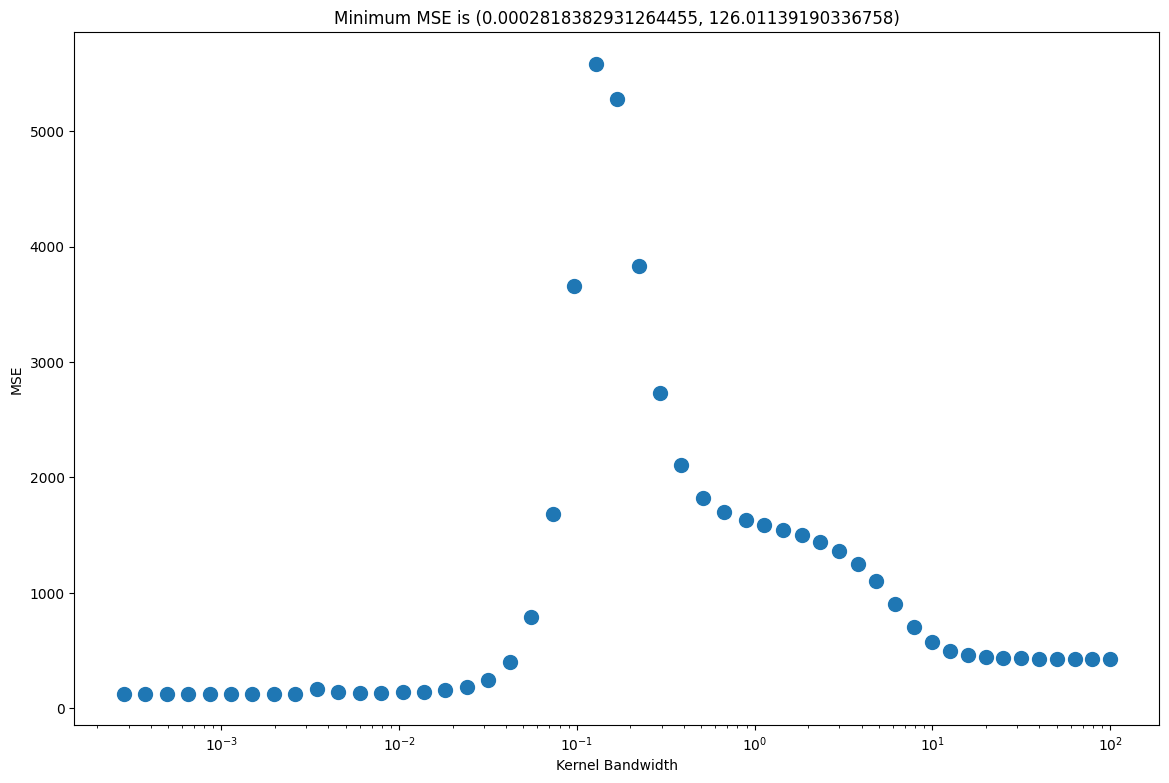

In [5]:
fig, ax = plt.subplots(figsize=(14,9))
mses.plot(kind="scatter", x="bw", y="mse", ax=ax, s=100)
ax.set_xscale("log")
ax.set_ylabel("MSE")
ax.set_xlabel("Kernel Bandwidth")
ax.set_title(f"Minimum MSE is {mses.iloc[np.argmin(mses.mse), 0], mses.iloc[np.argmin(mses.mse), 1]}")

/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_5104/3871119818.py:13: RuntimeWarning: divide by zero encountered in divide
  total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_5104/3871119818.py:14: RuntimeWarning: divide by zero encountered in divide
  all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)


18.79032192458211 0.0073079 inf


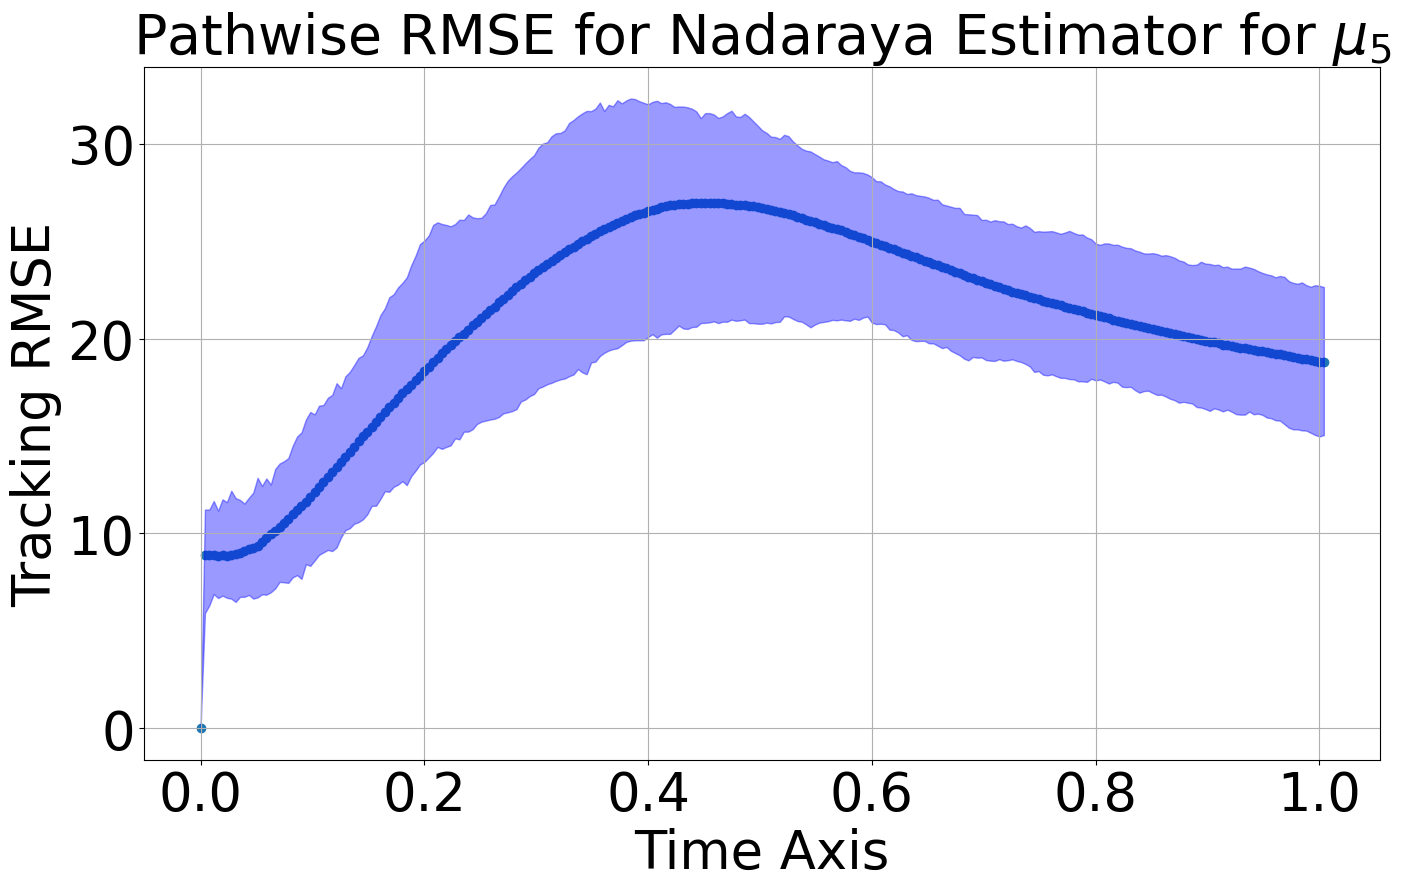

Final time cumulative MSE local-time error 18.79032192458211 with IQR ((15.053563064647523, 22.656070846878016))at bw 0.0073079 for 0.75FConst

18.54331256264535 0.009649 18.79032192458211


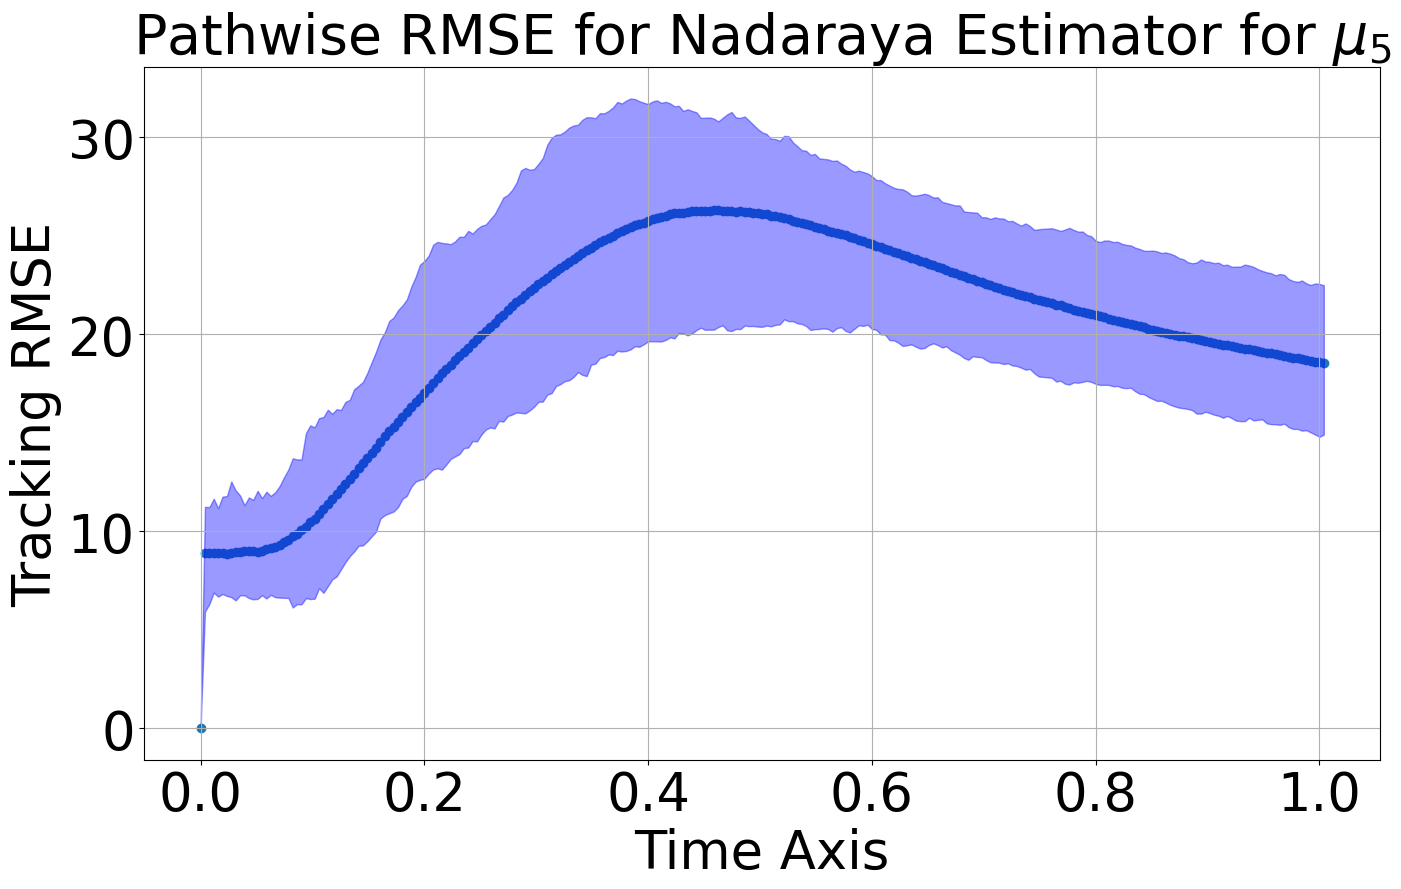

Final time cumulative MSE local-time error 18.54331256264535 with IQR ((14.899954280638049, 22.483986648647196))at bw 0.009649 for 0.75FConst

15.436152737936968 0.0127401 18.54331256264535


/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_5104/3871119818.py:13: RuntimeWarning: invalid value encountered in divide
  total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_5104/3871119818.py:14: RuntimeWarning: invalid value encountered in divide
  all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)


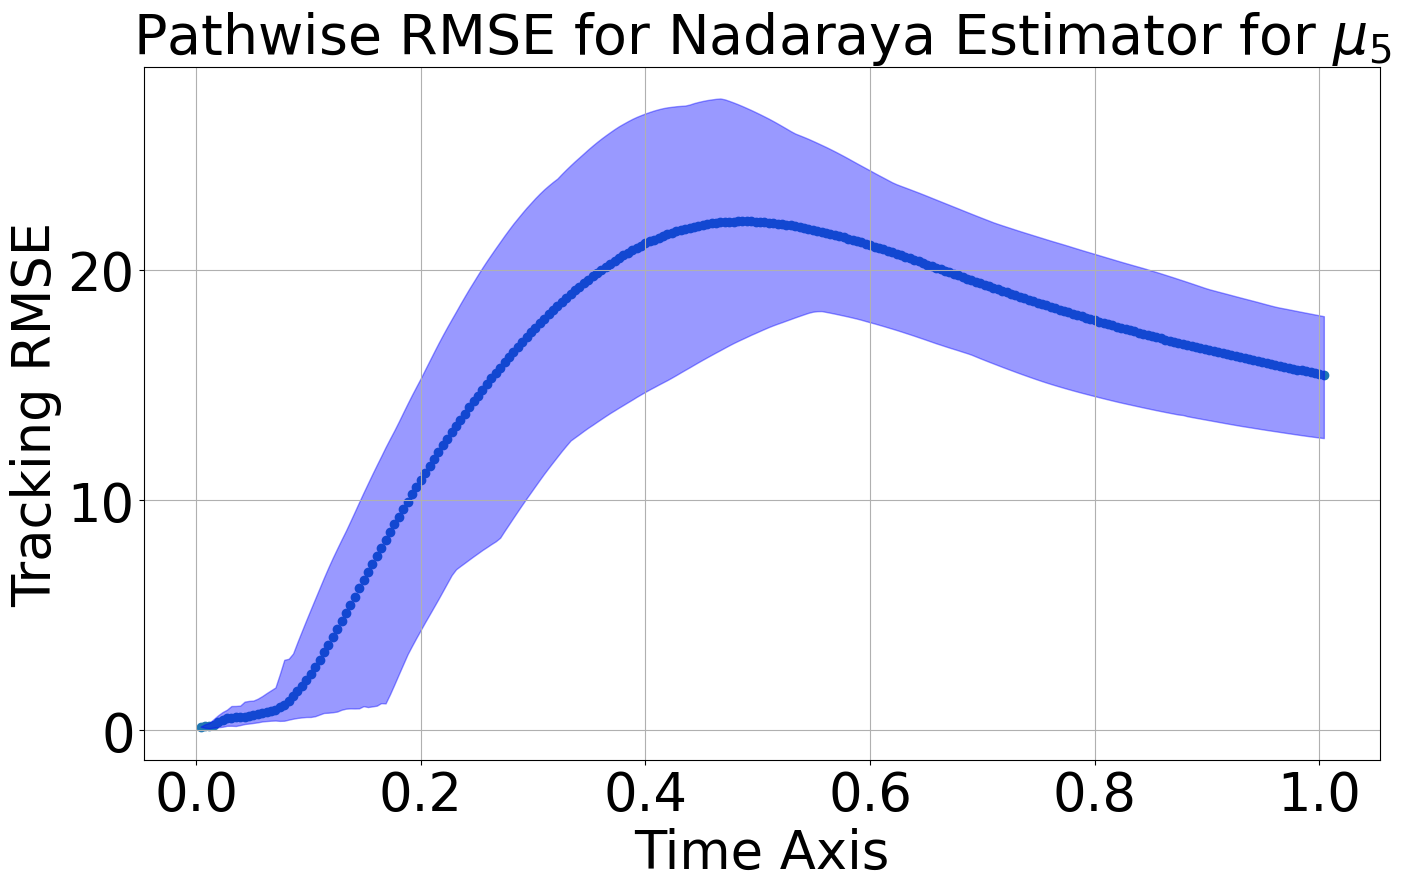

Final time cumulative MSE local-time error 15.436152737936968 with IQR ((12.687959835332423, 17.980934374878448))at bw 0.0127401 for 0.75FConst

17.55189856571846 0.0168214 15.436152737936968
16.22912470841774 0.0222102 15.436152737936968
13.114554950225276 0.0293252 15.436152737936968


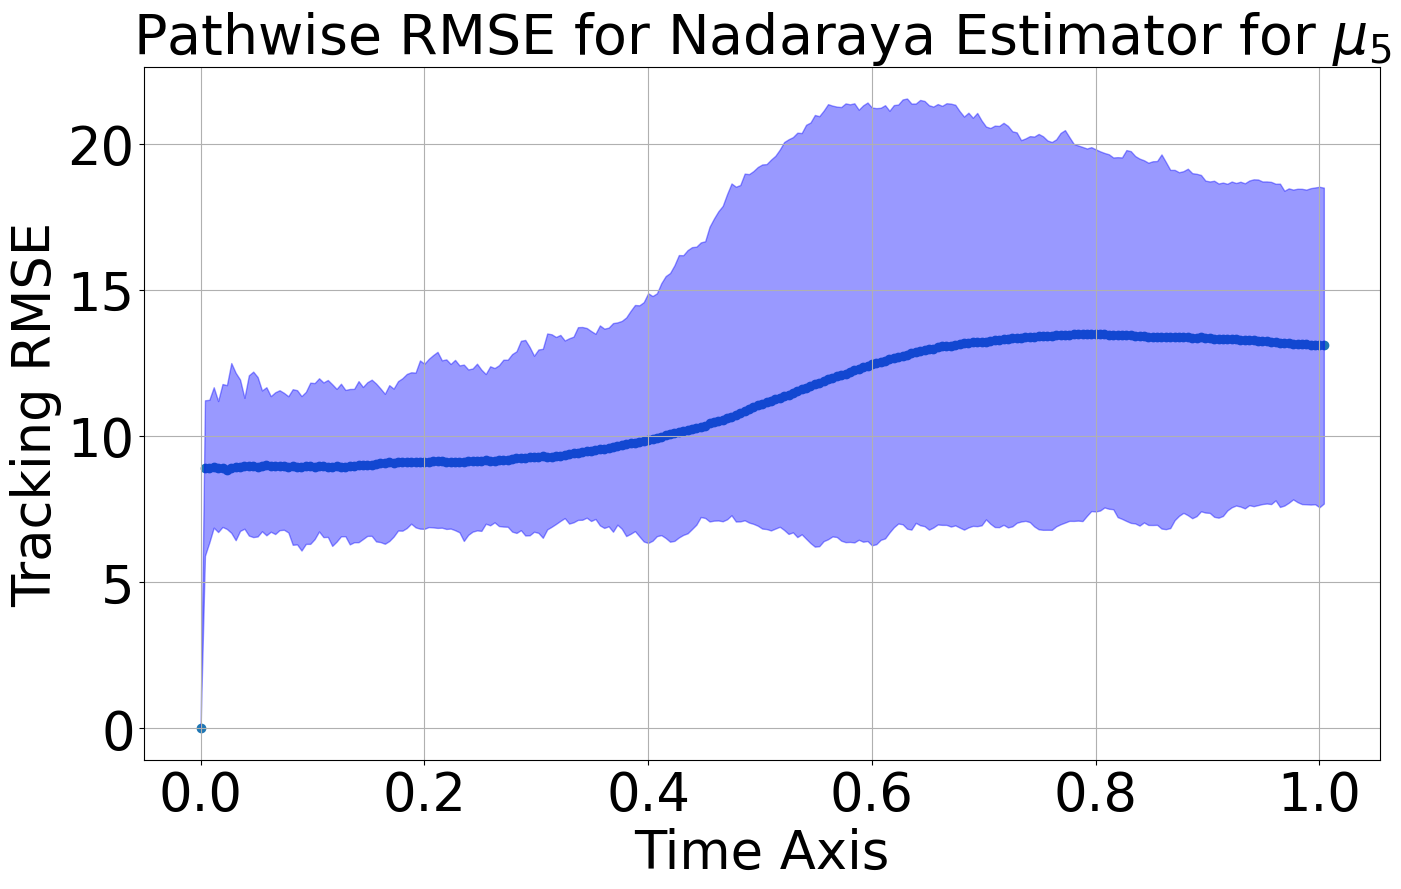

Final time cumulative MSE local-time error 13.114554950225276 with IQR ((7.686614457414045, 18.495372176701455))at bw 0.0293252 for 0.75FConst

10.036489692798037 0.0387196 13.114554950225276


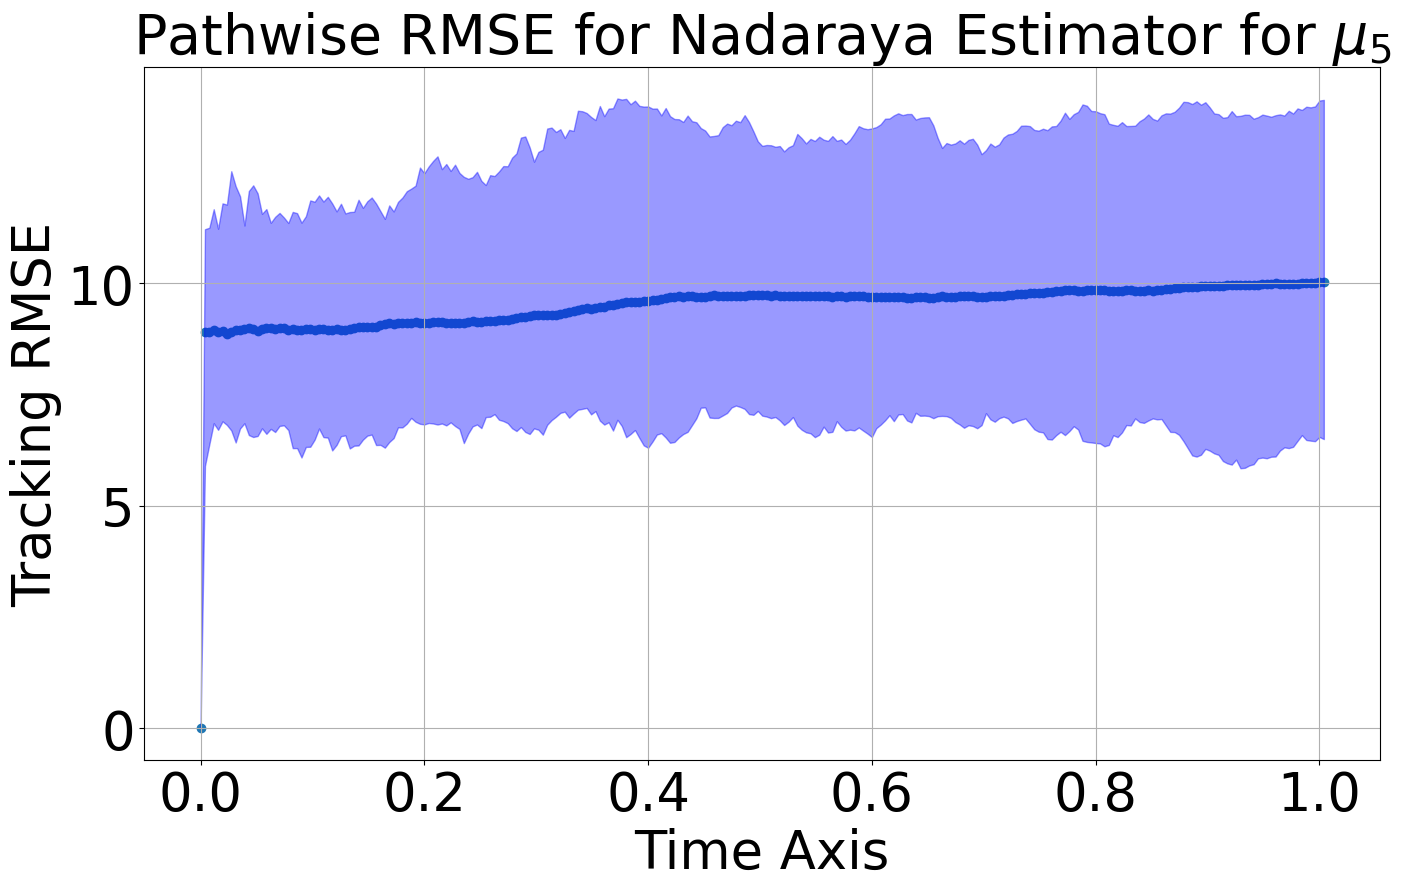

Final time cumulative MSE local-time error 10.036489692798037 with IQR ((6.4984310427328555, 14.121819841268778))at bw 0.0387196 for 0.75FConst

9.603617758220071 0.0511235 10.036489692798037


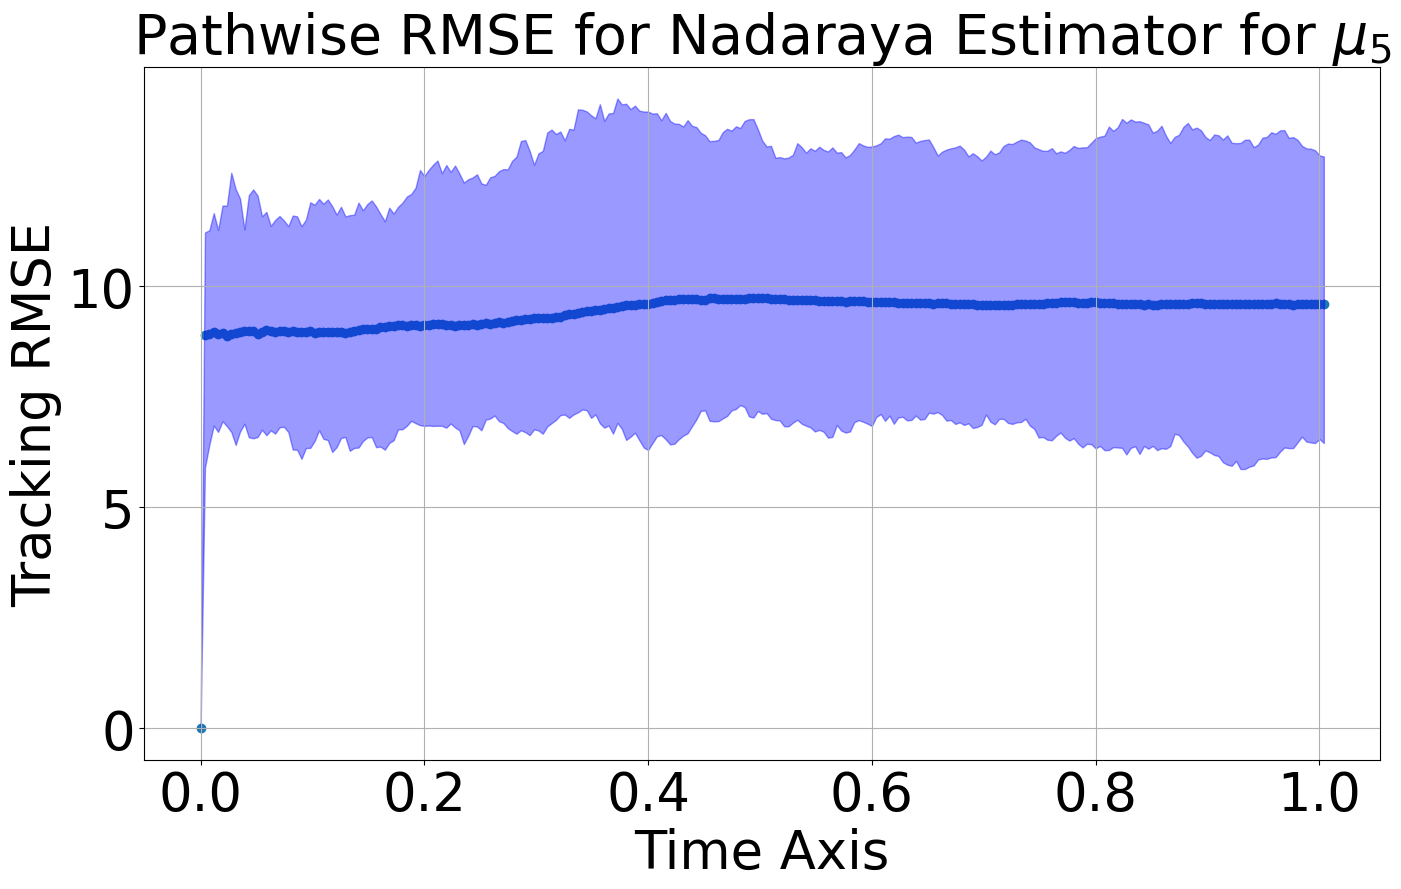

Final time cumulative MSE local-time error 9.603617758220071 with IQR ((6.451007910500588, 12.934132558523117))at bw 0.0511235 for 0.75FConst

5.324860319867288 0.067501 9.603617758220071


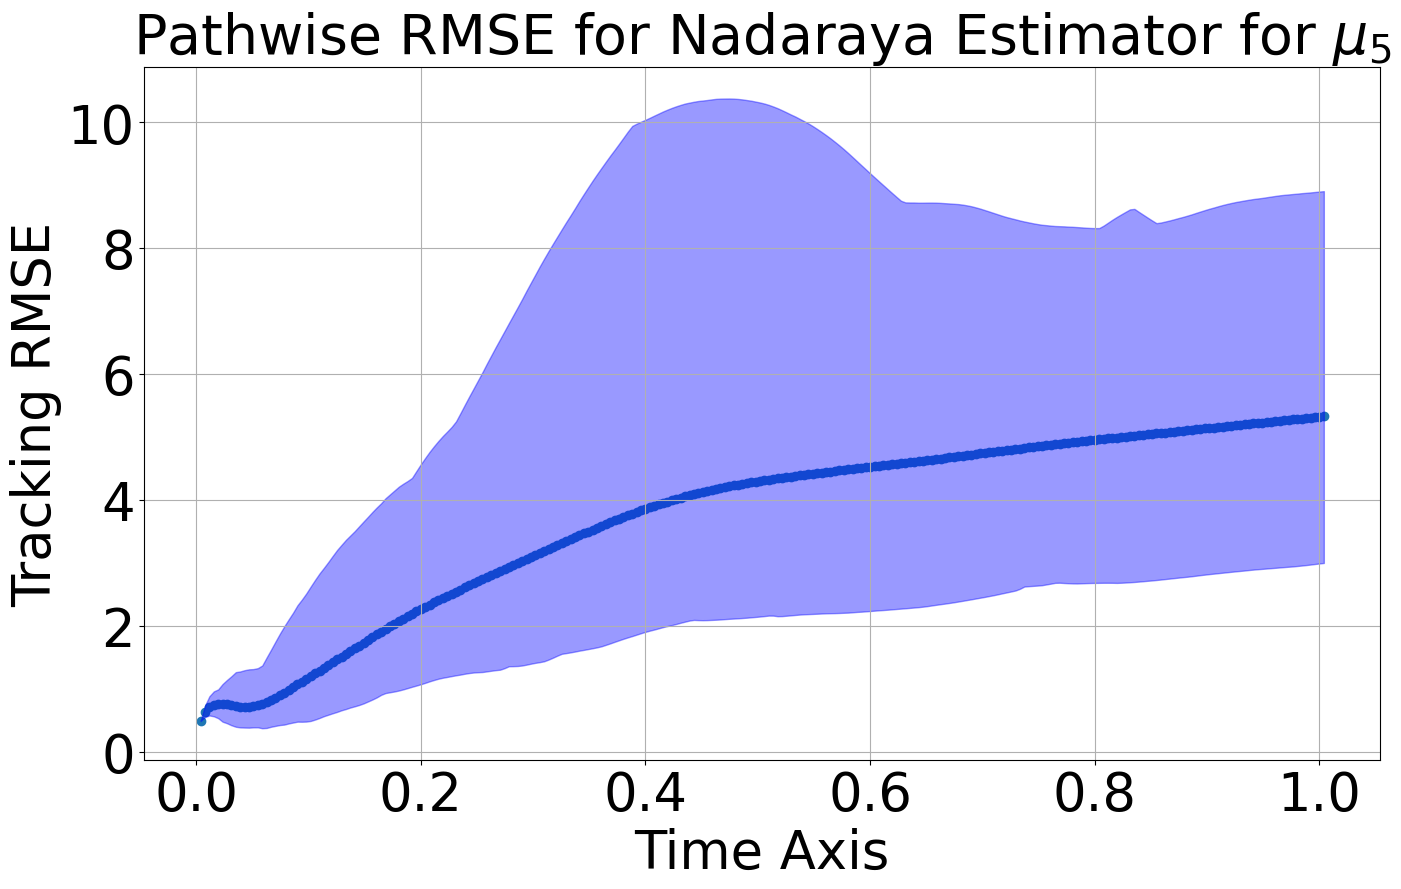

Final time cumulative MSE local-time error 5.324860319867288 with IQR ((2.998821249831773, 8.902526606969412))at bw 0.067501 for 0.75FConst

9.518897348625377 0.0891251 5.324860319867288
16.444743207059556 0.1 5.324860319867288
5.391003913137715 0.1135011 5.324860319867288
5.438134489786347 0.144544 5.324860319867288
5.4889697392200025 0.1840772 5.324860319867288
5.542413780921176 0.2344229 5.324860319867288
5.601848739276425 0.2985383 5.324860319867288
5.67669313736203 0.3801894 5.324860319867288
5.771572098315146 0.4841724 5.324860319867288
16.444743207059556 0.616595 5.324860319867288
19.091249049071617 0.7852356 5.324860319867288


In [6]:
curr_rmse = np.inf
toSave = False
i = 0
for file in zip(*[true_files, local_files, bws]):
    bw = file[-1]
    all_true_states = np.load(file[0])
    all_local_states = np.load(file[1])
    if all_local_states.shape[0] != 2: continue
    if (len(all_true_states.shape) == len(all_local_states.shape) == 4):
        time_steps = np.linspace(config.t0,config.deltaT*all_true_states.shape[2],all_true_states.shape[2])
        all_global_errors = np.sum(np.power(all_true_states- all_local_states,2), axis=-1)
        all_global_errors=all_global_errors.reshape(-1, all_global_errors.shape[-1])            # (K, N, T)
        total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
        all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)
        total_local_errors[total_local_errors==np.inf] = 0.
        all_paths_err[all_paths_err==np.inf] = 0.
        total_local_errors_minq, total_local_errors_maxq  = np.quantile(all_paths_err, q=[0.005, 0.995], axis=0) # (T,)
        print(total_local_errors[-1], bw, curr_rmse)
        i += 1
        if total_local_errors[-1]  < curr_rmse:
            curr_rmse = total_local_errors[-1]
            fig, ax = plt.subplots(figsize=(14,9))
            plt.grid(True)
            ax.scatter(time_steps, total_local_errors)
            plt.fill_between(time_steps,y1=total_local_errors_minq, y2=total_local_errors_maxq, color="blue", alpha=0.4)
            ax.set_title(rf"Pathwise RMSE for Nadaraya Estimator for $\mu_5$",fontsize=40)
            ax.set_ylabel("Tracking RMSE", fontsize=38)
            ax.set_xlabel("Time Axis", fontsize=38)
            ax.tick_params(labelsize=38)
            plt.tight_layout()
            if toSave:
                plt.savefig((root_dir + f"DiffusionModelPresentationImages/IIDNadaraya/40DLnzLessData/IIDNadaraya_{config.ndims}DLnz_DriftTrack_{round(bw, 6)}bw_{config.forcing_const}FConst_{config.forcing_const}FConst_{round(total_local_errors_minq[-1], 8)}_MinIQR_{round(total_local_errors[-1], 8)}MeanIQR_{round(total_local_errors_maxq[-1], 8)}_MaxIQR").replace(".", "")+".png")
            plt.show()
            plt.close()
            print(f"Final time cumulative MSE local-time error {total_local_errors[-1]} with IQR ({total_local_errors_minq[-1], total_local_errors_maxq[-1]})at bw {bw} for {config.forcing_const}FConst\n")

In [7]:
from utils.resource_logger import wallclock_and_system_metrics
data = wallclock_and_system_metrics(config.nadaraya_resource_logging_path, inclusive=False)
data

FileNotFoundError: [Errno 2] No such file or directory: '/Users/marcos/GitHubRepos/FractionalBrownianMotion/src/generative_modelling/resource_logging/trained_rec_PM_ST_1000FTh_MLP_2LFac_NSTgtNFMReg_40DLnz_750e-01FConst_VPSDE_T256_Ndiff10000_Tdiff1000e+00_DiffEmbSz64_ResLay10_ResChan8_DiffHdnSz64_TrueHybd_TrueWghts_t00_dT3906e-03_MLP_H4_CUp20_tl110.json.json'